# Sales forecasting system

## Problem Statement

We want to set up our company's warehouse in another location and we need to estimate the rate of sales, which has been increasing since the company's creation, for the next few months in order to provide the space we will need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
raw_df.to_csv("../data/raw/sales_forecast_raw.csv")
raw_df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [3]:
raw_df["date"] = pd.to_datetime(raw_df.date)
raw_df = raw_df.set_index("date")
processed_df = raw_df["sales"]
processed_df.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

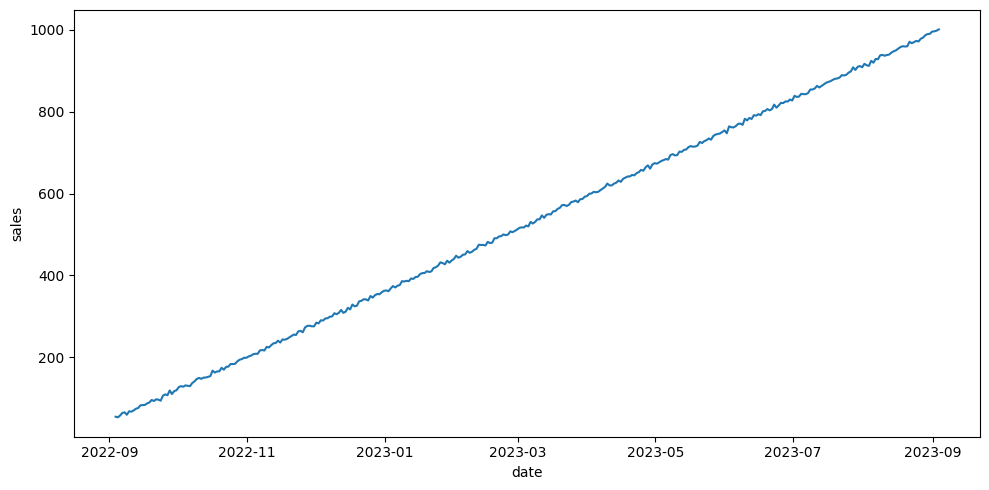

In [4]:
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = processed_df)
plt.tight_layout()
plt.show()

In [5]:
# Tensor: Starts at zero in September 9th.

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(processed_df, period = 30)
decomposition

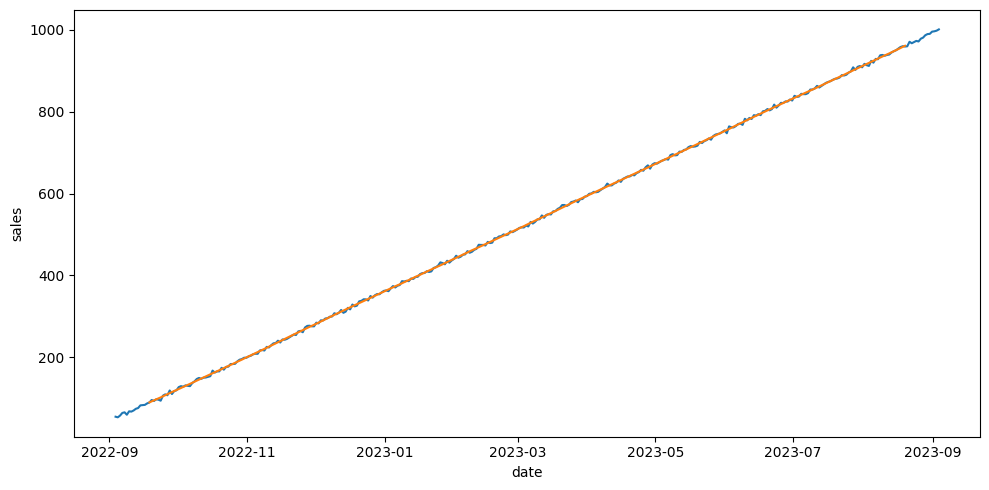

In [7]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = processed_df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

In [8]:
# Positive Trend

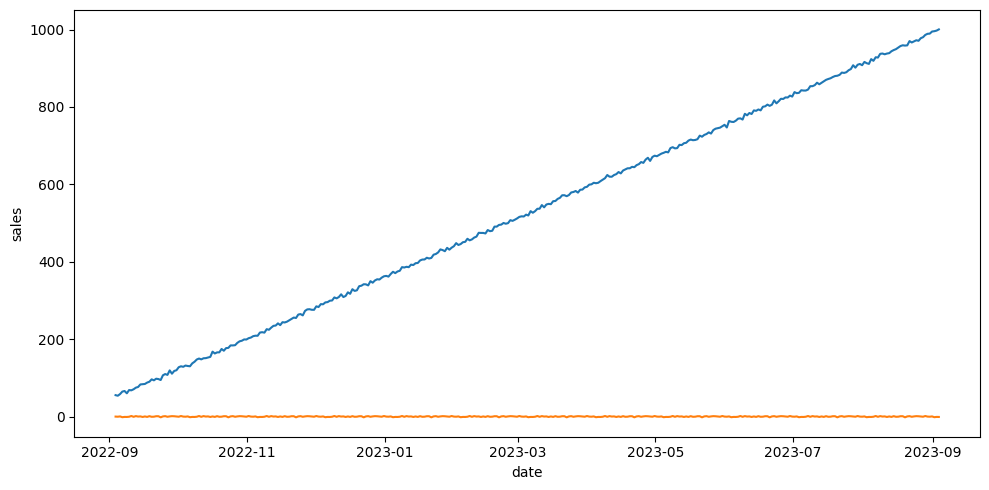

In [9]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = processed_df)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(processed_df)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [ ]:
# Here we can see that the p-value is greater than 0.05, this means that our null hypothesis will be rejected and we will take this series as non-stationary.

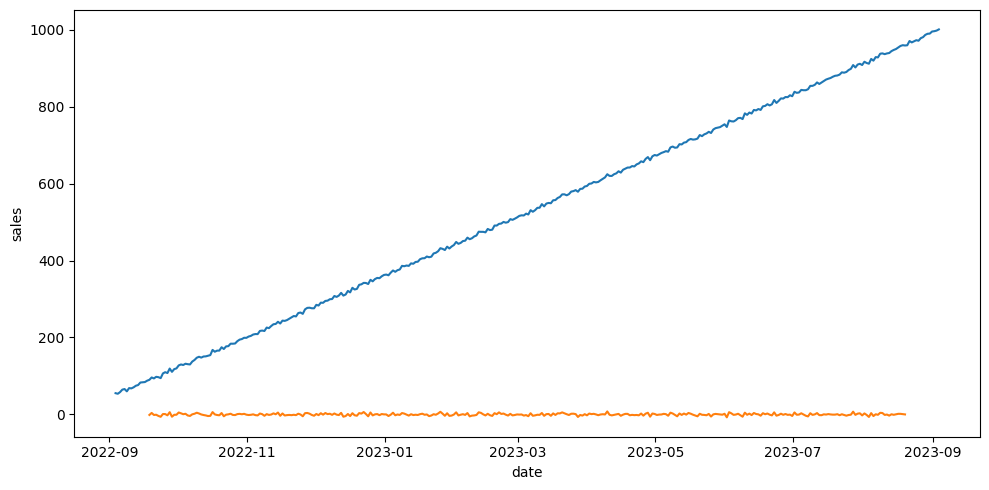

In [11]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = processed_df)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

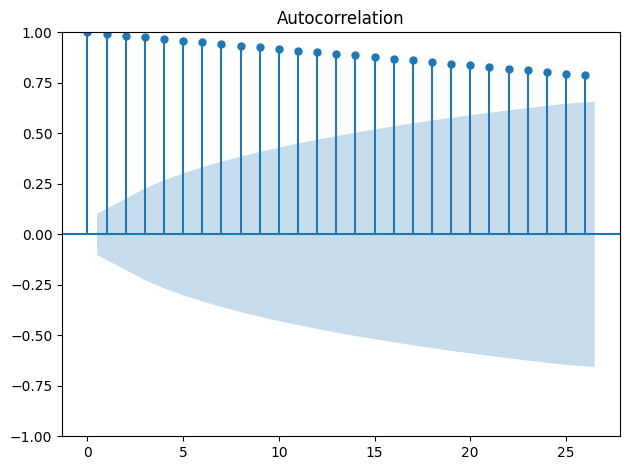

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(processed_df)

plt.tight_layout()

plt.show()

In [13]:
# There is a high correlation between the points and their delayed copies, which decreases over time.

In [31]:
from pmdarima import auto_arima

model = auto_arima(processed_df, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1847.125, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1972.853, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2209.657, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1844.660, Time=1.40 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1843.274, Time=0.53 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=1.37 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1843.586, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1841.532, Time=0.55 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1843.436, Time=2.04 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=1.40 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1839.552, Time=0.25 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1841.456, Time=0.66 sec
 ARIM

In [27]:
forecast = model.predict(50)
forecast

2023-09-04 17:10:08.079328    1.675366
2023-09-05 17:10:08.079328    2.673520
2023-09-06 17:10:08.079328    2.591621
2023-09-07 17:10:08.079328    2.598341
2023-09-08 17:10:08.079328    2.597789
2023-09-09 17:10:08.079328    2.597834
2023-09-10 17:10:08.079328    2.597831
2023-09-11 17:10:08.079328    2.597831
2023-09-12 17:10:08.079328    2.597831
2023-09-13 17:10:08.079328    2.597831
2023-09-14 17:10:08.079328    2.597831
2023-09-15 17:10:08.079328    2.597831
2023-09-16 17:10:08.079328    2.597831
2023-09-17 17:10:08.079328    2.597831
2023-09-18 17:10:08.079328    2.597831
2023-09-19 17:10:08.079328    2.597831
2023-09-20 17:10:08.079328    2.597831
2023-09-21 17:10:08.079328    2.597831
2023-09-22 17:10:08.079328    2.597831
2023-09-23 17:10:08.079328    2.597831
2023-09-24 17:10:08.079328    2.597831
2023-09-25 17:10:08.079328    2.597831
2023-09-26 17:10:08.079328    2.597831
2023-09-27 17:10:08.079328    2.597831
2023-09-28 17:10:08.079328    2.597831
2023-09-29 17:10:08.07932

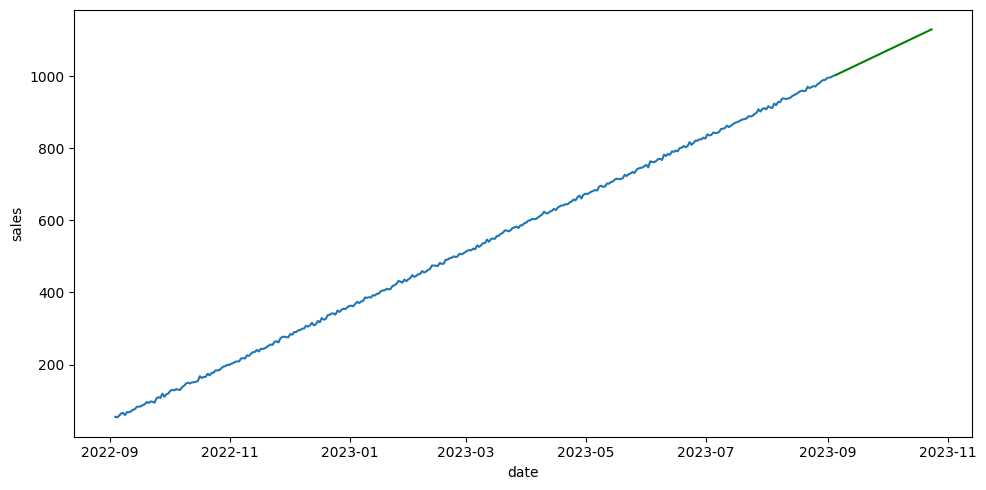

In [34]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = processed_df)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()